# Development of Emotion and Reasoning in the General Speeches of the United Nations: A text-based machine learning approach
## Script 2: Figures & Tables
### Author: Sarah Franzen

Run Script 0 and 1 beforehand in order to create the proper folder structure and implement the data.

### Description: 
#### This file creates the following figures

Descriptive Figures
- Frequency of speeches by year
- Frequency of speeches by country
- Longest and Shortest Speeches by Word Count
- Percentage of Speeches by official language
- Share of female speakers
- Share of position by speakers

Result Figures
- Emotionaliy Scoring overall
- Emotionality Scoring by permanent Security Council Membership
- Emotionality Scoring by permanent Security Council Members
- Emotionality Scoring by Gender
- Emotionality Scoring by English as official language
- Emotionality Scoring by Position

### Set Up & Load Data

In [21]:
# == Import libraries for data processing and visualization ==
import matplotlib.pyplot as plt
#from matplotlib.colors import ListedColormap
import seaborn as sns
import os
import joblib
import pandas as pd
from scipy import stats
from tabulate import tabulate
import textwrap

# === Set Working Directory ===

# Prompt user to enter working directory path
#wd = input("Please enter your working directory path (e.g., C:\\Users\\sarah\\OneDrive\\Dokumente\\Masterarbeit): ").strip()

# Change to the entered working directory
#try:
   # os.chdir(wd)
    #print(f"Working directory set to: {os.getcwd()}")
#except FileNotFoundError:
   # print("ERROR: The directory you entered does not exist. Please restart and enter a valid path.")
    #exit(1)

# Set your working directory (adjust this as needed)
wd = r"C:\Users\sarah\OneDrive\Dokumente\Masterarbeit"

# === Define Folder Paths ===
wd_results = os.path.join(wd, 'results')
data_c = os.path.join(wd, 'data')
data_temp = os.path.join(data_c, 'temp')
data_freq = os.path.join(data_c, 'freq')
fig_dir = os.path.join(wd, 'fig')

# == Define Global Plotting Settings ===

FIGSIZE = (12, 6)
LINEWIDTH = 2
MARKER = None

# Grid style
GRID_STYLE = "whitegrid"
sns.set_style(GRID_STYLE)

# X-axis ticks
TICK_YEARS = [1946] + list(range(1950, 2025, 5))
if 2024 not in TICK_YEARS:
    TICK_YEARS.append(2024)

#TICK_YEARS = list(range(1946, 2024, 5))
#if 2024 not in TICK_YEARS:
  #  TICK_YEARS.append(2024) 
XTICK_ROTATION = 45

# Font sizes
AXIS_LABEL_FONT_SIZE = 14      # for x and y axis labels
TICK_LABEL_FONT_SIZE = 14      # for x and y tick labels
LEGEND_FONT_SIZE = 12          # legend text

# === Tick Settings ===
TICK_LENGTH = 5
TICK_WIDTH = 2
TICK_COLOR = 'black'
TICK_DIRECTION = 'out'

# Y-axis range for primary axis (y1)
Y_RANGE_EMOTIONALITY = (0.4, 1.4)

# Y-axis for second axis (y2)
AX_SET_YLIM = 0
AX_SET_Y_MARGIN = 0
SECOND_Y_AXIS_BOTTOM = 0

# Spines & Grid Lines
SPINE_COLOR = 'darkgrey'
SPINE_WIDTH = 1.5
GRID_COLOR = 'darkgrey'
GRID_WIDTH = 1.0


# Legend settings
LEGEND_LOC = "upper center"
LEGEND_BBOX = (0.5, -0.15)
LEGEND_NCOL = 3     

# Layout
TIGHT_LAYOUT_RECT = [0, 0, 1, 1]

# Despine options
DESPINE_SETTINGS = dict(left=True, right=True, top=True, bottom=False)

# Note
FIG_NOTE_FONT = dict(ha='center', fontsize=11, fontstyle='italic')

# Color Palette
CUSTOM_COLORS = ['#004260', '#50822E', '#f2c80c',
                 #'#F69B2D', 
                 '#E4003A', '#D95F02']

# === Load data ===
os.chdir(wd_results)
un_corpus_scored = pd.read_csv(
    os.path.join(wd_results, "un_corpus_scored.csv"),
    sep=';', 
    encoding='utf-8'
)

# Keep only rows where 'score' is not NA
rows_before = len(un_corpus_scored)
un_corpus_scored = un_corpus_scored[un_corpus_scored['score'].notna()]
print(f"Rows dropped due to missing score: {rows_before - len(un_corpus_scored)}")

Rows dropped due to missing score: 0


In [243]:
un_corpus_scored.head()

,filename,speech,country_code,year,country_name,speech_length_words,english_official_language,security_council_permanent,speaker_name,position,gender_dummy,speech_label,affect_d,cognition_d,score
0,HTI_70_2015.txt,"Mr. President, I would like to express my warm...",HTI,2015,Haiti,1601,0,0,Mr. Michel Joseph Martelly,(Vice-) President,0.0,Haiti (2015),1.364583,1.170656,0.766168
1,PRY_58_2003.txt,﻿Two hundred years after the first cry of free...,PRY,2003,Paraguay,1385,0,0,Nicanor Duarte Frutos,(Vice-) President,NaN,Paraguay (2003),0.784654,0.861974,1.067943
2,GMB_72_2017.txt,With warm greetings to all members of the Gene...,GMB,2017,Gambia,1696,1,0,Mr. Adama Barrow,(Vice-) President,0.0,Gambia (2017),1.183515,1.094364,0.901559
3,SLV_04_1949.txt,Mr. Castro stated that the election of General...,SLV,1949,El Salvador,2211,0,0,Mr. Castro,NaN,0.0,El Salvador (1949),1.309417,0.809819,0.580234
4,LBY_56_2001.txt,"﻿At the\noutset, I would like to congratulate ...",LBY,2001,Libya,4110,0,0,Abdurrahman Mohamed Shalghem,(Deputy) Minister for Foreign Affairs,NaN,Libya (2001),1.131063,0.935927,0.816614


## Figures

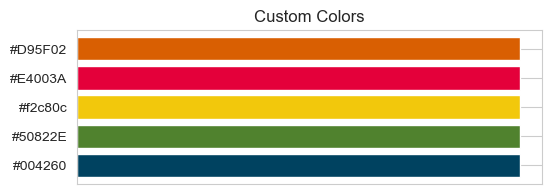

In [3]:
# Plot the individual colors as horizontal bars
plt.figure(figsize=(6, 2))
for i, color in enumerate(CUSTOM_COLORS):
    plt.barh(y=i, width=1, color=color)
plt.yticks(range(len(CUSTOM_COLORS)), CUSTOM_COLORS)
plt.xticks([])
plt.title("Custom Colors")
plt.show()

### Figure: Frequency of speeches by year

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


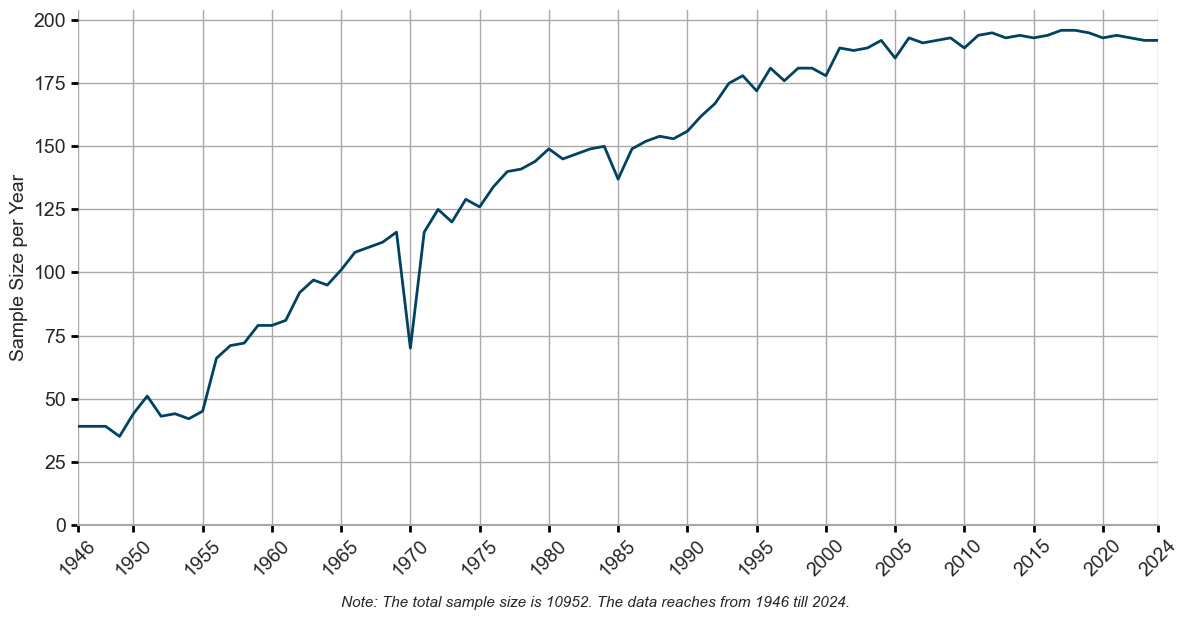

year
1946    39
Name: count, dtype: int64
year
2024    192
Name: count, dtype: int64


In [22]:
# === Overall Sample Size per Year Plot ===

overall_sample_size_per_year = un_corpus_scored['year'].value_counts().sort_index()
overall_total = overall_sample_size_per_year.sum()

fig, ax = plt.subplots(figsize=FIGSIZE)

sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax
)

# Labels
ax.set_xlabel("")
ax.set_ylabel("Sample Size per Year", fontsize=AXIS_LABEL_FONT_SIZE)

# Y-axis limits and margins
ax.set_ylim(bottom=AX_SET_YLIM)
ax.margins(y=AX_SET_Y_MARGIN)

# X-axis: fixed range and major ticks
ax.set_xlim(1946, 2024)
ax.set_xticks(TICK_YEARS)
ax.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Tick parameters — force them to appear
ax.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)

# Spines
ax.spines['left'].set_color(SPINE_COLOR)
ax.spines['left'].set_linewidth(SPINE_WIDTH)
ax.spines['bottom'].set_color(SPINE_COLOR)
ax.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Grid lines
ax.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Despine
sns.despine(**DESPINE_SETTINGS)

# Optional note under the plot
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'frequency_by_year.png'), bbox_inches='tight')
plt.show()

# Get the first and last value
pd.set_option('display.max_rows', None)
overall_sample_size_per_year

# Show only the first and last year
print(overall_sample_size_per_year.head(1))
print(overall_sample_size_per_year.tail(1))

# Reset the display option to original
pd.reset_option('display.max_rows')

### Figure: Frequency of speeches by country

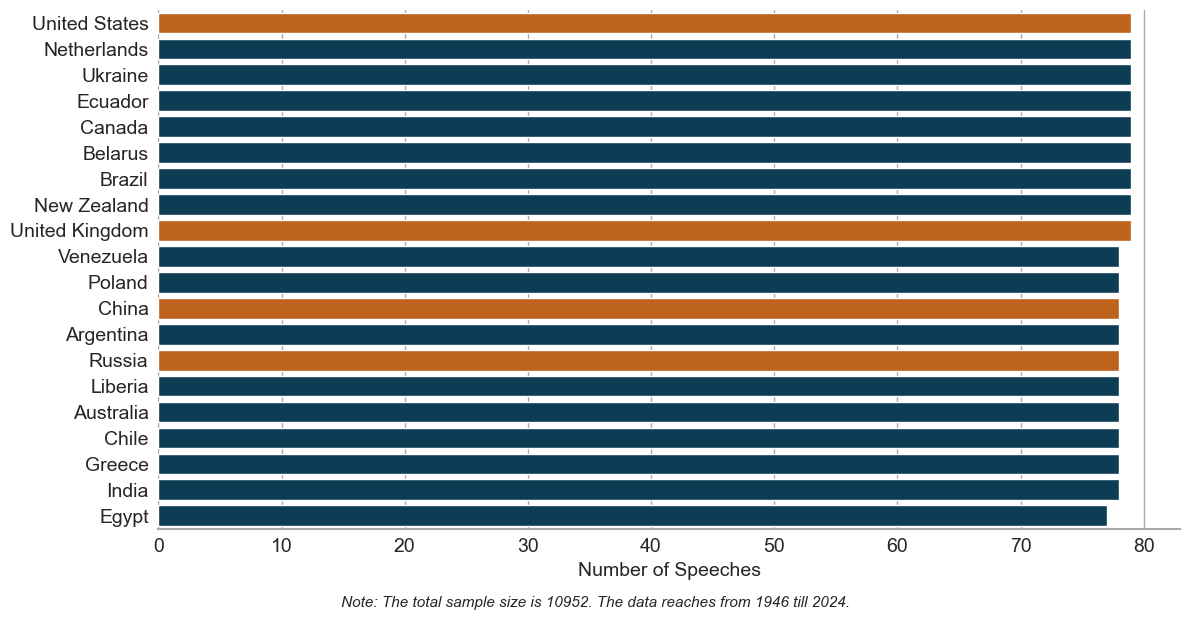

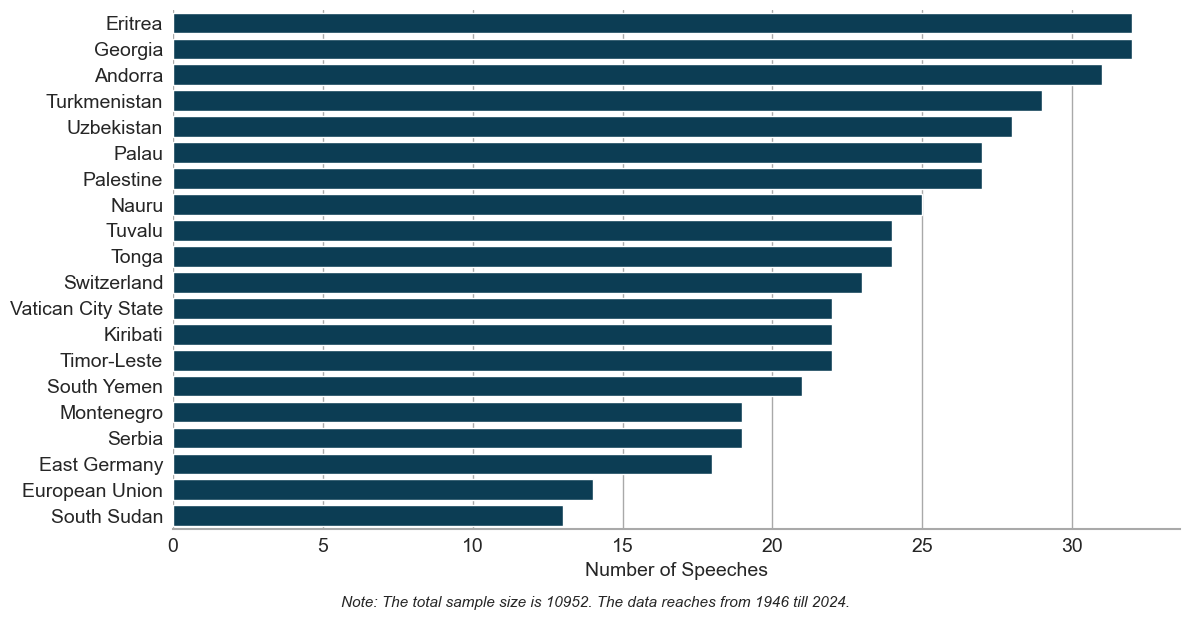

In [249]:
# === Graph 1: Top 20 Countries by Frequency ===

top_countries = un_corpus_scored['country_name'].value_counts().nlargest(20)

# Get security council status for top countries
country_security_status = (
    un_corpus_scored.groupby('country_name')['security_council_permanent']
    .agg(lambda x: x.mode()[0] if not x.mode().empty else 0)
    .reindex(top_countries.index)
)

# Assign colors: orange if permanent member of security council, blue otherwise
colors_barchart_sec_council = ['#D95F02' if status == 1 else '#004260' for status in country_security_status]

plt.figure(figsize=FIGSIZE) 
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors_barchart_sec_council)

# Axis labels and ticks
plt.xlabel("Number of Speeches", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Apply global despine settings
sns.despine(**DESPINE_SETTINGS)

# Thicker spines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)

# Grid lines
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Add note below
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'top_20_countries_by_frequency.png'), bbox_inches='tight')
plt.show()


# === Graph 2: Bottom 20 Countries by Frequency ===

bottom_countries = un_corpus_scored['country_name'].value_counts().nsmallest(20)
bottom_countries = bottom_countries.sort_values(ascending=False)

plt.figure(figsize=FIGSIZE)
sns.barplot(x=bottom_countries.values, y=bottom_countries.index, color=CUSTOM_COLORS[0])

# Axis labels and ticks
plt.xlabel("Number of Speeches", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Apply global despine settings
sns.despine(**DESPINE_SETTINGS)

# Thicker spines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)

# Grid lines
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Add note below
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'bottom_20_countries_by_frequency.png'), bbox_inches='tight')
plt.show()


### Figure: Length of Speeches over time (BEOFRE PREPROCESSING)

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

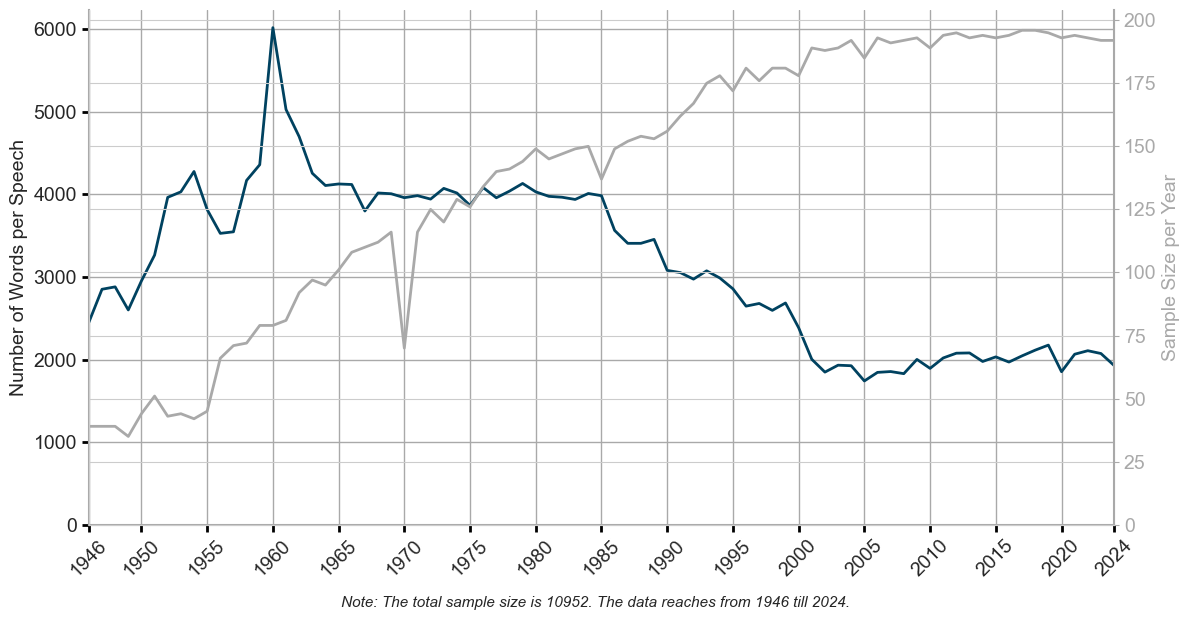

In [25]:
# === Average Speech Length per Year Plot ===

speech_length_words = un_corpus_scored.groupby("year")["speech_length_words"].mean()

fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: average number of words
sns.lineplot(
    x=speech_length_words.index,
    y=speech_length_words.values,
    color=CUSTOM_COLORS[0], 
    linewidth=LINEWIDTH,
    ax=ax1
)

# Labels
ax1.set_xlabel("")
ax1.set_ylabel("Number of Words per Speech", fontsize=AXIS_LABEL_FONT_SIZE)

# Tick label font size
ax1.tick_params(labelsize=TICK_LABEL_FONT_SIZE)

# Y-axis limits and margins
ax1.set_ylim(bottom=AX_SET_YLIM)
ax1.margins(y=AX_SET_Y_MARGIN)

# X-axis: fixed range and ticks
ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Tick parameters
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR
)
ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH, color=TICK_COLOR
)

# Spines for left y-axis
ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)

# Grid lines
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# === Right y-axis: sample size in dark grey ===
ax2 = ax1.twinx()
sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(axis='y', colors='darkgrey', labelsize=TICK_LABEL_FONT_SIZE)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

# Right spine
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)

# Despine (keep top hidden)
sns.despine(left=False, right=False, top=True, bottom=False)

# Note
plt.figtext(
    0.5, -0.02,
    f"Note: The total sample size is {overall_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

# Layout & save
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'speech_length_by_year.png'), bbox_inches='tight')
plt.show()


### Figure: Longest and Shortest Speeches by Word Count BEFORE PREPROCESSING

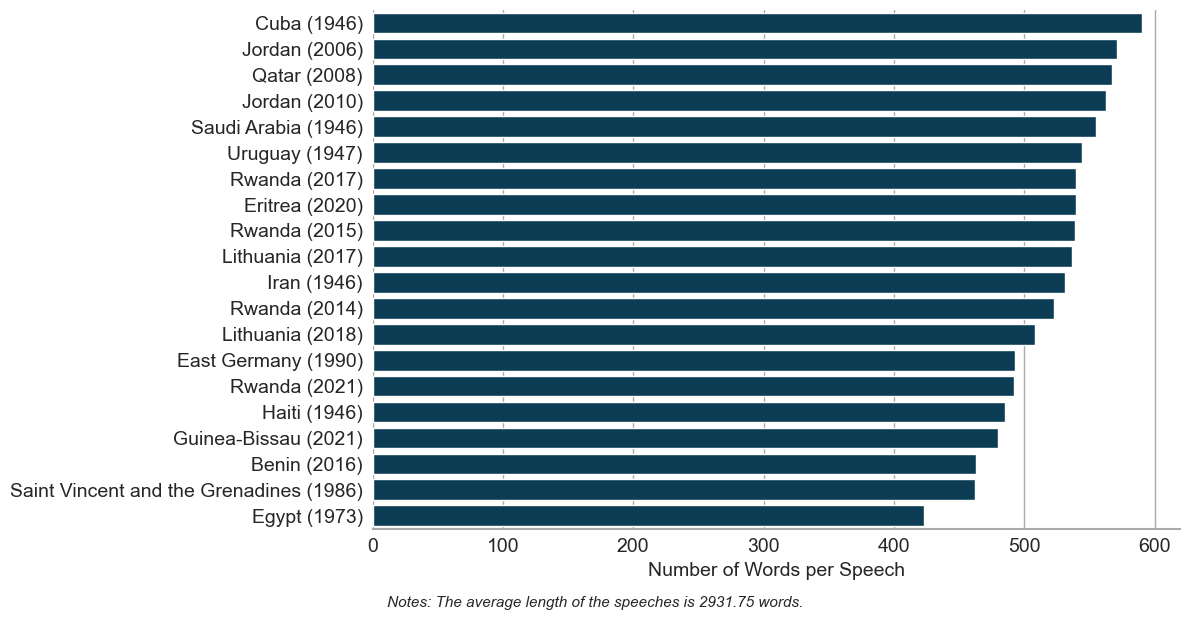

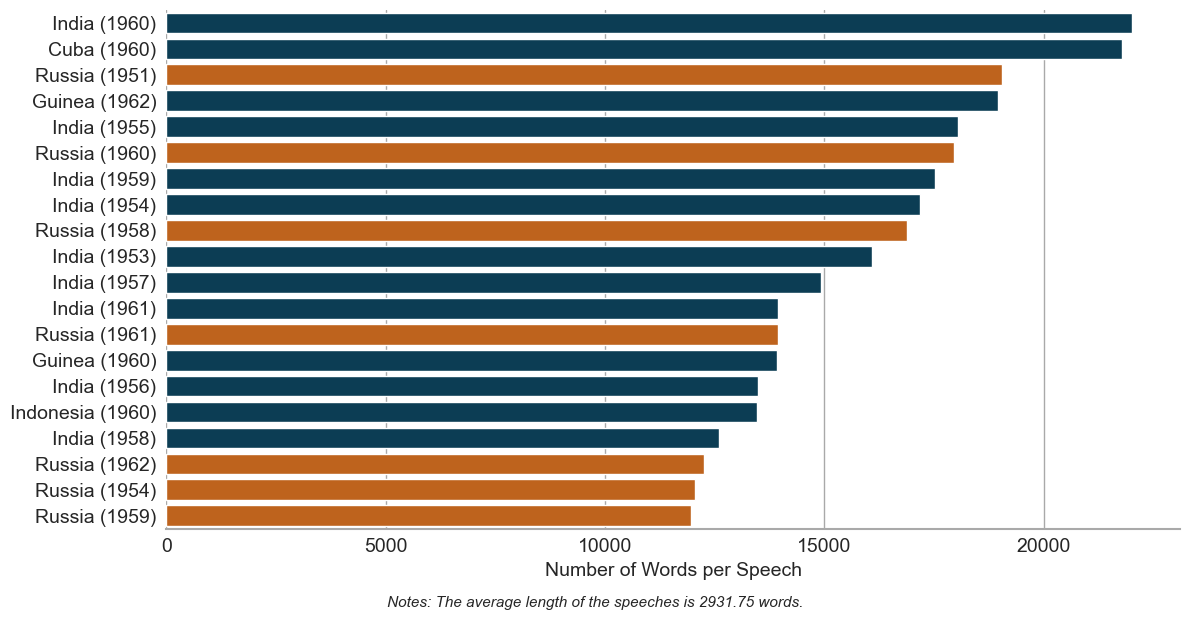

In [257]:
# === Graph 1: 20 Shortest Speeches ===
shortest_speeches = (
    un_corpus_scored.nsmallest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words']]
)

plt.figure(figsize=FIGSIZE)
sns.barplot(
    data=shortest_speeches,
    x='speech_length_words',
    y='speech_label',
    color=CUSTOM_COLORS[0]  # consistent blue
)

# Labels
plt.xlabel("Number of Words per Speech", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")

# Tick label font size
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Spines & grid lines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

# === Note ===
plt.figtext(
    0.5, -0.02,
    f"Notes: The average length of the speeches is 2931.75 words.",
     **FIG_NOTE_FONT
)

plt.savefig(os.path.join(fig_dir, '20_shortest_speeches.png'), bbox_inches='tight')
plt.show()


# === Graph 2: 20 Longest Speeches ===
longest_speeches = (
    un_corpus_scored.nlargest(20, 'speech_length_words')
    .sort_values(by='speech_length_words', ascending=False)
    [['speech_label', 'speech_length_words', 'country_name', 'security_council_permanent']]
)

# Assign colors: orange if permanent member of security council, blue otherwise
colors_longest_speeches = [
    '#D95F02' if status == 1 else '#004260' 
    for status in longest_speeches['security_council_permanent']
]

plt.figure(figsize=FIGSIZE)
sns.barplot(
    data=longest_speeches,
    x='speech_length_words',
    y='speech_label',
    palette=colors_longest_speeches
)

# Labels
plt.xlabel("Number of Words per Speech", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("")

# Tick label font size
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Spines & grid lines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

# === Note ===
plt.figtext(
    0.5, -0.02,
    f"Notes: The average length of the speeches is 2931.75 words.",
     **FIG_NOTE_FONT
)

plt.savefig(os.path.join(fig_dir, '20_longest_speeches.png'), bbox_inches='tight')
plt.show()


### Figure: Percentage of Speeches from Countries with English as Official Language

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


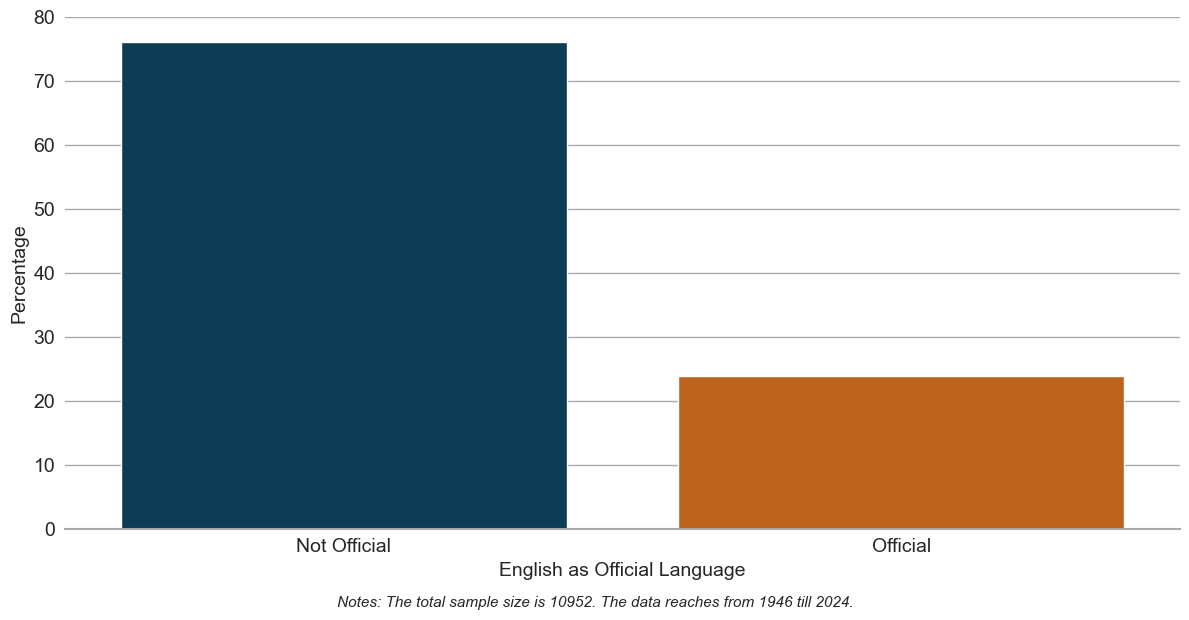

In [259]:
# === Share of English as Official Language ===

# Count and normalize to get percentages
official_language_percent = (
    un_corpus_scored['english_official_language']
    .value_counts(normalize=True)
    .sort_index() * 100
)

official_language_sample_size_per_year = un_corpus_scored.groupby('year')['english_official_language'].count()
official_language_total = official_language_sample_size_per_year.sum()

# Define labels
eng_labels = ['Not Official', 'Official']

# Plot
plt.figure(figsize=FIGSIZE)
sns.barplot(
    x=eng_labels,
    y=official_language_percent.values,
    palette=[CUSTOM_COLORS[0], CUSTOM_COLORS[4]]  # consistent color scheme
)

# Labels
plt.xlabel("English as Official Language", fontsize=AXIS_LABEL_FONT_SIZE)
plt.ylabel("Percentage", fontsize=AXIS_LABEL_FONT_SIZE)

# Tick labels
plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)

# Y-axis limit
plt.ylim(0, 80)

# Spines & grid lines
ax = plt.gca()
for spine in ['left', 'bottom']:
    ax.spines[spine].set_color(SPINE_COLOR)
    ax.spines[spine].set_linewidth(SPINE_WIDTH)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# Despine & layout
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

# Note below
plt.figtext(
    0.5, -0.02,
    f"Notes: The total sample size is {official_language_total}. The data reaches from 1946 till 2024.",
    **FIG_NOTE_FONT
)

# Save and show
plt.savefig(os.path.join(fig_dir, 'share_english_official_language.png'), bbox_inches='tight')
plt.show()


### Figure: Share of female speakers

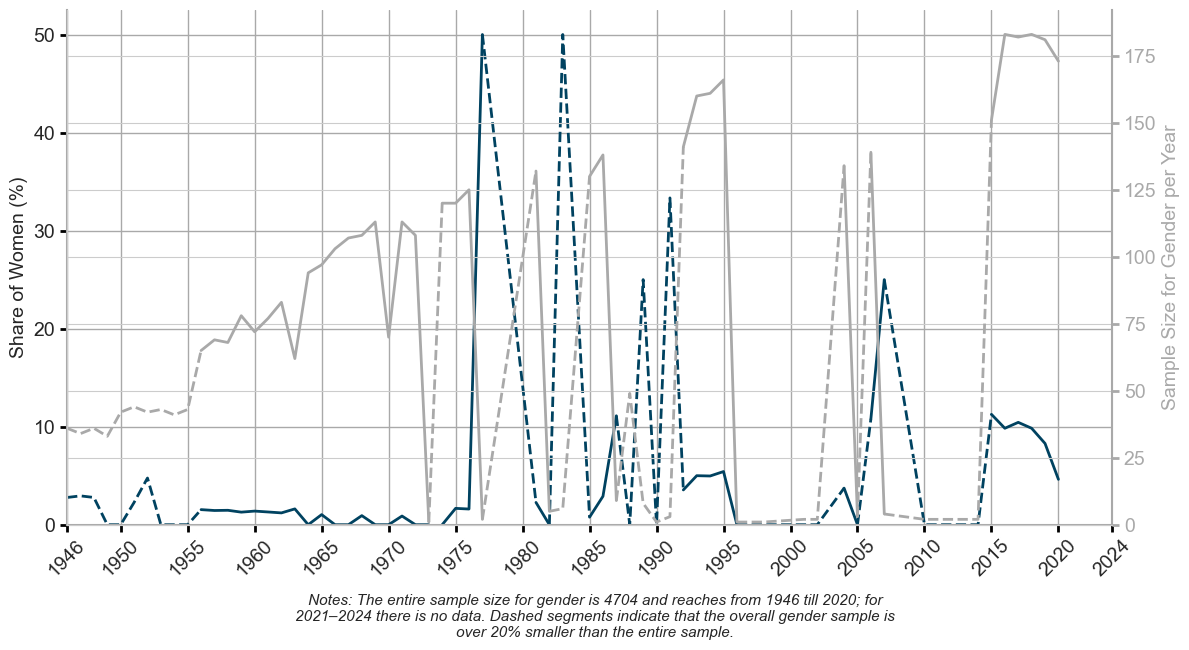

In [63]:
# === Share of Female Speakers by Year ===

# Filter to only 0 and 1 (exclude NaNs)
df_gender = un_corpus_scored[un_corpus_scored['gender_dummy'].isin([0, 1])]

# Percentage share of women per year
female_percent = df_gender.groupby('year')['gender_dummy'].mean() * 100

# Sample size per year
gender_sample_size_per_year = df_gender.groupby('year')['gender_dummy'].count()

# Total sample size included in the plot
gender_total = gender_sample_size_per_year.sum()

# Threshold for dotted line: 20% of overall sample
threshold = 0.3 * overall_sample_size_per_year.max()

# Function to plot conditional line (solid if >= threshold, dashed if < threshold)
def plot_conditional_line(ax, x, y, reference, threshold, color, linewidth=LINEWIDTH):
    """
    reference: array used to determine when to switch between solid and dashed
    """
    x, y, reference = list(x), list(y), list(reference)
    start_idx = 0
    current_style = '-' if reference[0] >= threshold else '--'

    for i in range(1, len(y)):
        new_style = '-' if reference[i] >= threshold else '--'
        if new_style != current_style:
            ax.plot(x[start_idx:i+1], y[start_idx:i+1],
                    color=color, linewidth=linewidth, linestyle=current_style)
            start_idx = i
            current_style = new_style
    ax.plot(x[start_idx:], y[start_idx:], color=color, linewidth=linewidth, linestyle=current_style)

# --- Plot setup ---
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# --- Left y-axis: Percentage of Women (depends on sample size) ---
x = female_percent.index
y = female_percent.values
ref = gender_sample_size_per_year.reindex(x).fillna(0).values  # ensure same index

plot_conditional_line(
    ax1, x, y, reference=ref, threshold=threshold,
    color=CUSTOM_COLORS[0], linewidth=LINEWIDTH
)

# === Axis Labels ===
ax1.set_xlabel("")
ax1.set_ylabel("Share of Women (%)", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_ylim(bottom=AX_SET_YLIM)
ax1.margins(y=AX_SET_Y_MARGIN)

# === X-Axis Settings ===
ax1.set_xlim(1946, 2024)
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

# === Tick Parameters ===
ax1.tick_params(
    axis='y', which='both', left=True, right=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x', which='both', bottom=True, top=False,
    direction=TICK_DIRECTION, length=TICK_LENGTH, width=TICK_WIDTH,
    color=TICK_COLOR, labelsize=TICK_LABEL_FONT_SIZE
)

# === Spines (Left Axis) ===
ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === Grid Lines ===
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)

# --- Right y-axis: Sample size per year ---
ax2 = ax1.twinx()
x2 = gender_sample_size_per_year.index
y2 = gender_sample_size_per_year.values

plot_conditional_line(
    ax2, x2, y2, reference=y2, threshold=threshold,
    color='darkgrey', linewidth=LINEWIDTH
)

ax2.set_ylabel("Sample Size for Gender per Year", color='darkgrey', fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y', colors='darkgrey', direction=TICK_DIRECTION,
    length=TICK_LENGTH, width=TICK_WIDTH, labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

# === Despine & Layout ===
sns.despine(left=False, right=False, top=True, bottom=False)

# === Note below the plot ===

note_text = (
    f"Notes: The entire sample size for gender is {gender_total} and reaches from 1946 till 2020; "
    f"for 2021–2024 there is no data. Dashed segments indicate that the overall gender sample "
    f"is over 30% smaller than the entire sample."
)
wrapped_text = "\2015 tn".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.07, wrapped_text, **FIG_NOTE_FONT)

# === Save & Show ===
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'share_female_speakers_by_year.png'), bbox_inches='tight')
plt.show()


### Figure: Share of position by speakers

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

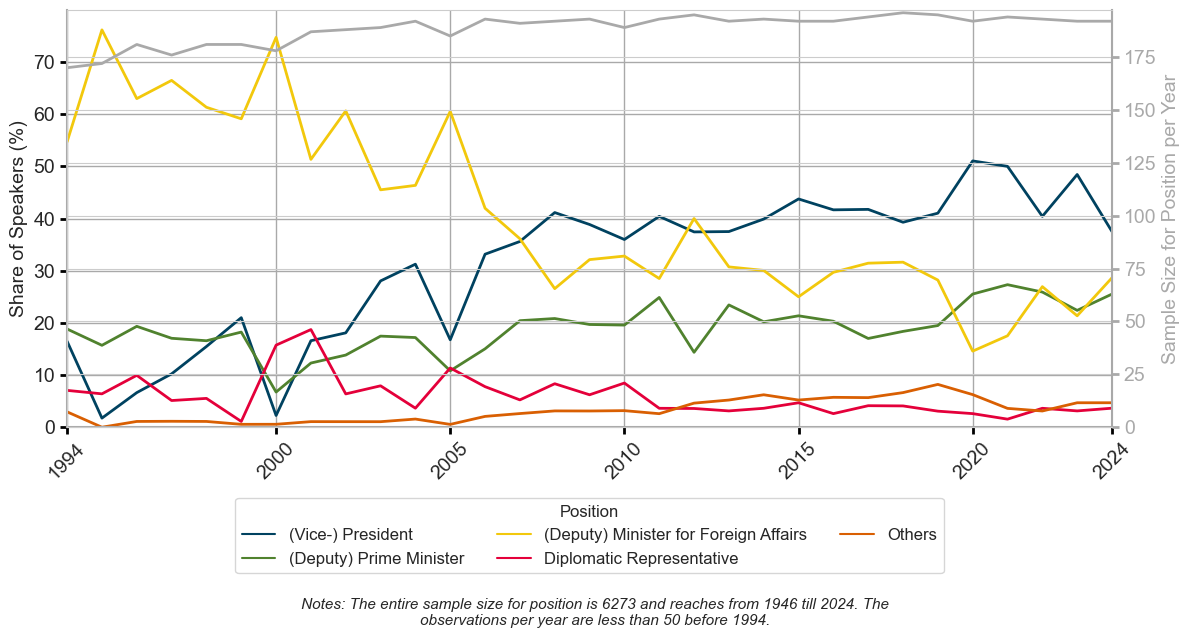

In [61]:
# === Share of Speaker Positions by Year (Representative Period) ===

# === Preprocess ===
merge_to_others = ["Head of State", "Monarch", "Head of Government"]
un_corpus_scored["position"] = un_corpus_scored["position"].replace(merge_to_others, "Others")

# Counts per year and position
position_counts = (
    un_corpus_scored.groupby(['year', 'position'])
    .size()
    .unstack(fill_value=0)
    .sort_index()
)

# Sample size per year (positions subset)
position_sample_size_per_year = position_counts.sum(axis=1)
position_total = position_sample_size_per_year.sum()

# === Threshold for representativeness ===
representative_ratio = position_sample_size_per_year / overall_sample_size_per_year
first_representative_year = representative_ratio[representative_ratio >= 0.70].index.min()

# Filter data from first representative year onward
position_counts = position_counts.loc[position_counts.index >= first_representative_year]
position_sample_size_per_year = position_sample_size_per_year.loc[position_sample_size_per_year.index >= first_representative_year]

# Percentages per year per position
position_percentage = position_counts.div(position_counts.sum(axis=1), axis=0) * 100

# Focus on selected top positions
top_positions = [
    '(Vice-) President', 
    '(Deputy) Prime Minister', 
    '(Deputy) Minister for Foreign Affairs', 
    'Diplomatic Representative', 
    'Others'
]
position_percentage = position_percentage[top_positions].fillna(0)

# Long format
position_percentage_long = (
    position_percentage
    .reset_index()
    .melt(id_vars="year", var_name="position", value_name="percentage")
)

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Percentages by position
sns.lineplot(
    data=position_percentage_long,
    x="year",
    y="percentage",
    hue="position",
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

# === Labels ===
ax1.set_ylabel("Share of Speakers (%)", fontsize=AXIS_LABEL_FONT_SIZE)
ax1.set_xlabel("")

# === Tick Parameters (Global) ===
ax1.tick_params(
    axis='y',
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)
ax1.tick_params(
    axis='x',
    which='both',
    bottom=True,
    top=False,
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    color=TICK_COLOR,
    labelsize=TICK_LABEL_FONT_SIZE
)

# === Spines (Global) ===
ax1.spines['left'].set_color(SPINE_COLOR)
ax1.spines['left'].set_linewidth(SPINE_WIDTH)
ax1.spines['bottom'].set_color(SPINE_COLOR)
ax1.spines['bottom'].set_linewidth(SPINE_WIDTH)
ax1.spines['top'].set_visible(False)
ax1.spines['right'].set_visible(False)

# === Grid Lines (Global) ===
ax1.yaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
ax1.xaxis.grid(True, color=GRID_COLOR, linewidth=GRID_WIDTH, zorder=0)
sns.despine(left=False, right=False, top=True, bottom=False)

# === Y-axis & Limits ===
ax1.set_ylim(bottom=0)

# === Secondary y-axis: Sample size per year ===
ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color="darkgrey",
    linewidth=LINEWIDTH,
    ax=ax2
)

ax2.set_ylabel("Sample Size for Position per Year", color="darkgrey", fontsize=AXIS_LABEL_FONT_SIZE)
ax2.tick_params(
    axis='y',
    colors='darkgrey',
    direction=TICK_DIRECTION,
    length=TICK_LENGTH,
    width=TICK_WIDTH,
    labelsize=TICK_LABEL_FONT_SIZE
)
ax2.spines['right'].set_visible(True)
ax2.spines['right'].set_color(SPINE_COLOR)
ax2.spines['right'].set_linewidth(SPINE_WIDTH)
ax2.set_ylim(bottom=0)

# === X-axis: start at 1994, ticks every 10 years ===
x_start = max(first_representative_year, 1994)
ax1.set_xlim(x_start, 2024)
xtick_years = [2000, 1994] + list(range(2000, 2025, 5))
xtick_years = sorted(set(xtick_years + [2024]))
#xtick_years = list(range(1994, 2025, 5))
ax1.set_xticks(xtick_years)
ax1.set_xticklabels(xtick_years, rotation=XTICK_ROTATION, fontsize=TICK_LABEL_FONT_SIZE)

# === Legend ===
ax1.legend(
    title="Position",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL,
    fontsize=LEGEND_FONT_SIZE,
    title_fontsize=LEGEND_FONT_SIZE
)

# === Note under the plot ===
import textwrap
note_text = (
    f"Notes: The entire sample size for position is {position_total} and reaches from 1946 till 2024. "
    f"The observations per year are less than 50 before {first_representative_year}."
)
wrapped_text = "\n".join(textwrap.wrap(note_text, width=90))
plt.figtext(0.5, -0.05, wrapped_text, **FIG_NOTE_FONT)

# === Layout & Save ===
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'share_speaker_positions_by_year_representative_part.png'), bbox_inches='tight')
plt.show()


In [277]:

# Print the full table
import pandas as pd
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("\n=== Share of Speaker Positions per Year (in %) ===\n")
print(position_percentage)


=== Share of Speaker Positions per Year (in %) ===

position  (Vice-) President  (Deputy) Prime Minister  \
year                                                   
1994              16.470588                18.823529   
1995               1.744186                15.697674   
1996               6.629834                19.337017   
1997              10.227273                17.045455   
1998              15.469613                16.574586   
1999              20.994475                18.232044   
2000               2.247191                 6.741573   
2001              16.577540                12.299465   
2002              18.085106                13.829787   
2003              28.042328                17.460317   
2004              31.250000                17.187500   
2005              16.756757                10.810811   
2006              33.160622                15.025907   
2007              35.602094                20.418848   
2008              41.145833                20.83333

### Figure: Emotionality Scoring overall

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

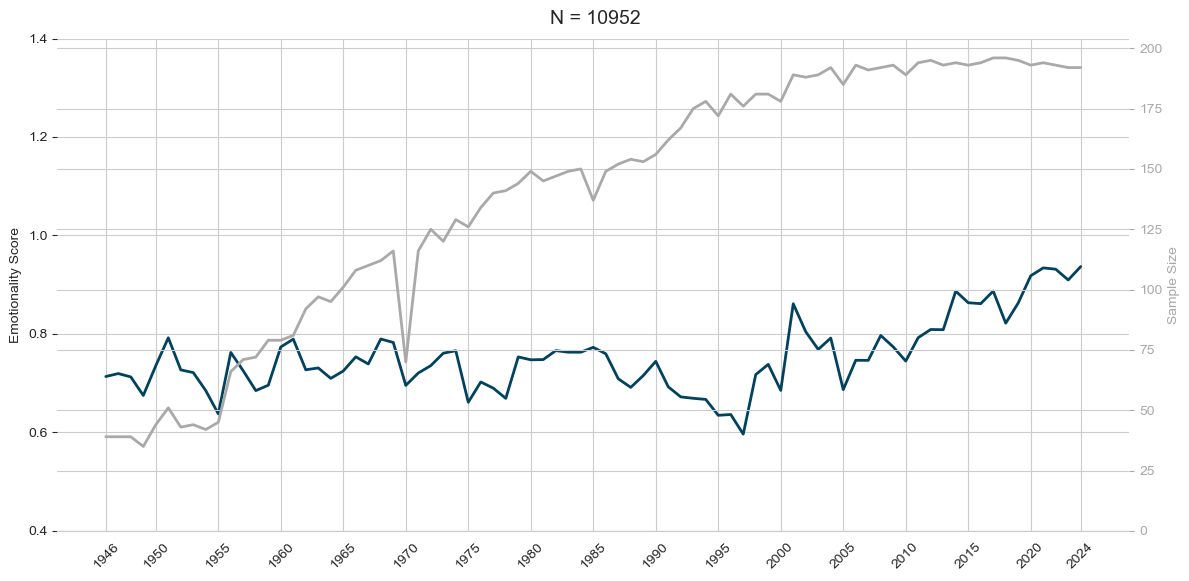

In [39]:
# Mean score per year
score_over_time = un_corpus_scored.groupby('year')['score'].mean()

# Plot
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score
sns.lineplot(
    x=score_over_time.index,
    y=score_over_time.values,
    marker=MARKER,
    color=CUSTOM_COLORS[0],
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=overall_sample_size_per_year.index,
    y=overall_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)


sns.despine(**DESPINE_SETTINGS)

plt.suptitle(f"N = {overall_total}", fontsize=14, y=0.96)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time.png'), bbox_inches='tight')
plt.show()


In [268]:
score_table = (
    un_corpus_scored
    .groupby('year')['score']
    .agg(['mean', 'count'])
    .reset_index()
    .rename(columns={'mean':'avg_score', 'count':'n'})
)

# Round for readability
score_table['avg_score'] = score_table['avg_score'].round(3)

# Ensure all rows are displayed
with pd.option_context('display.max_rows', None):
    display(score_table)


,year,avg_score,n
0,1946,0.713,39
1,1947,0.719,39
2,1948,0.713,39
3,1949,0.675,35
4,1950,0.735,44
5,1951,0.792,51
6,1952,0.727,43
7,1953,0.721,44
8,1954,0.685,42
9,1955,0.638,45


### Figure: Emotionality by permanent Security Council Membership

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

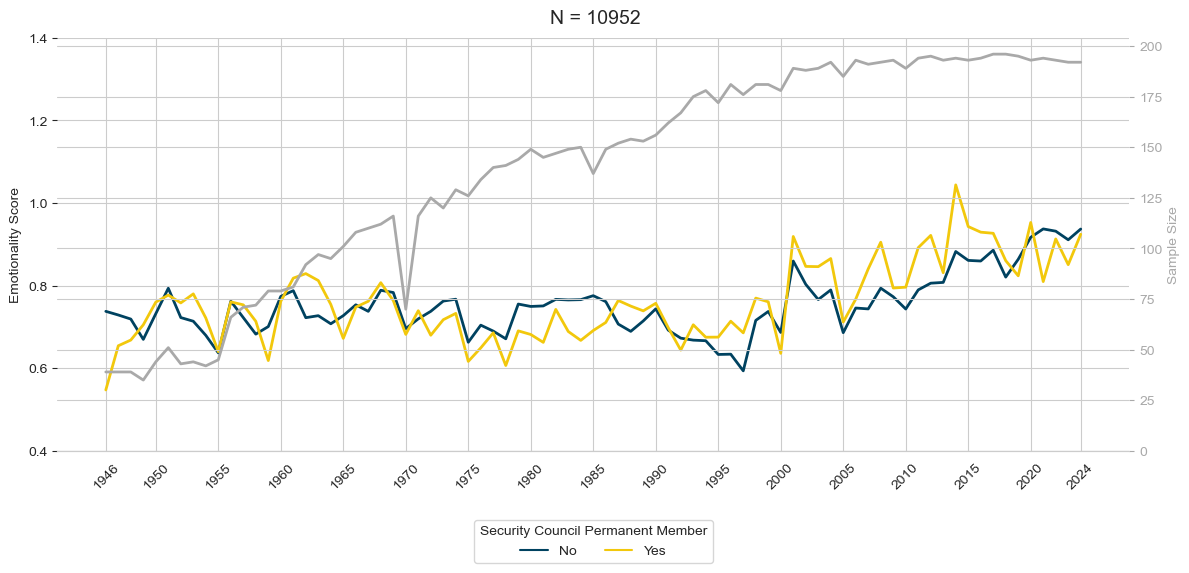

In [41]:
# Total sample size 
security_council_total = un_corpus_scored['security_council_permanent'].notna().sum()

# Sample size per year (non-missing scores)
security_council_sample_size_per_year = un_corpus_scored.groupby('year')['security_council_permanent'].count()

# Mean scores by year and security council membership
score_over_time_security_council = (
    un_corpus_scored
    .groupby(['year', 'security_council_permanent'])['score']
    .mean()
    .reset_index()
)

score_over_time_security_council['security_council_permanent_label'] = score_over_time_security_council['security_council_permanent'].map({0: 'No', 1: 'Yes'})

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score by SC membership
sns.lineplot(
    data=score_over_time_security_council,
    x='year',
    y='score',
    hue='security_council_permanent_label',
    palette={'No': CUSTOM_COLORS[0], 'Yes': CUSTOM_COLORS[2]},
    linewidth=LINEWIDTH,
    marker=MARKER,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=security_council_sample_size_per_year.index,
    y=security_council_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

ax1.legend(
    title="Security Council Permanent Member",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

plt.suptitle(f"N = {security_council_total}", fontsize=14, y=0.96)
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_security_council_membership.png'))
plt.show()


### Figure: Emotionality Scoring by permanent Security Council Members

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

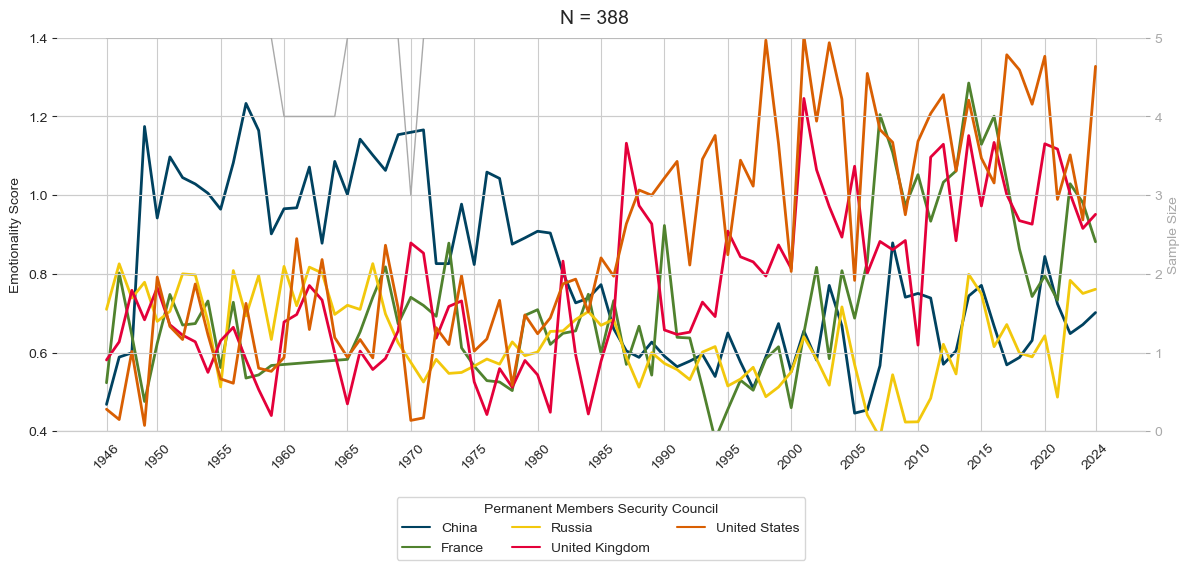

In [43]:
# Filter only Security Council permanent members
permanent_members = un_corpus_scored[un_corpus_scored['security_council_permanent'] == 1]

# Total sample size
permanent_members_total = permanent_members[['score', 'country_name']].dropna().shape[0]

# Sample size per year
permanent_members_sample_size_per_year = permanent_members.groupby('year')['security_council_permanent'].count()

# Mean scores by year and country_name
score_over_time_permanent_members = (
    permanent_members
    .groupby(['year', 'country_name'])['score']
    .mean()
    .reset_index()
)

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score by country_name
sns.lineplot(
    data=score_over_time_permanent_members,
    x='year',
    y='score',
    hue='country_name',
    palette=CUSTOM_COLORS,
    linewidth=LINEWIDTH,
    ax=ax1
)

ax1.set_ylabel("Emotionality Score")
ax1.set_xlabel("")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=permanent_members_sample_size_per_year.index,
    y=permanent_members_sample_size_per_year.values,
    color='darkgrey',
    linewidth=1,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.set_ylim(0, 5)
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Legend
ax1.legend(
    title="Permanent Members Security Council",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

sns.despine(**DESPINE_SETTINGS)

plt.suptitle(f"N = {permanent_members_total}", fontsize=14, y=0.96)

plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_permanent_members.png'))
plt.show()


### Figure: Emotionality Scoring by Gender

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

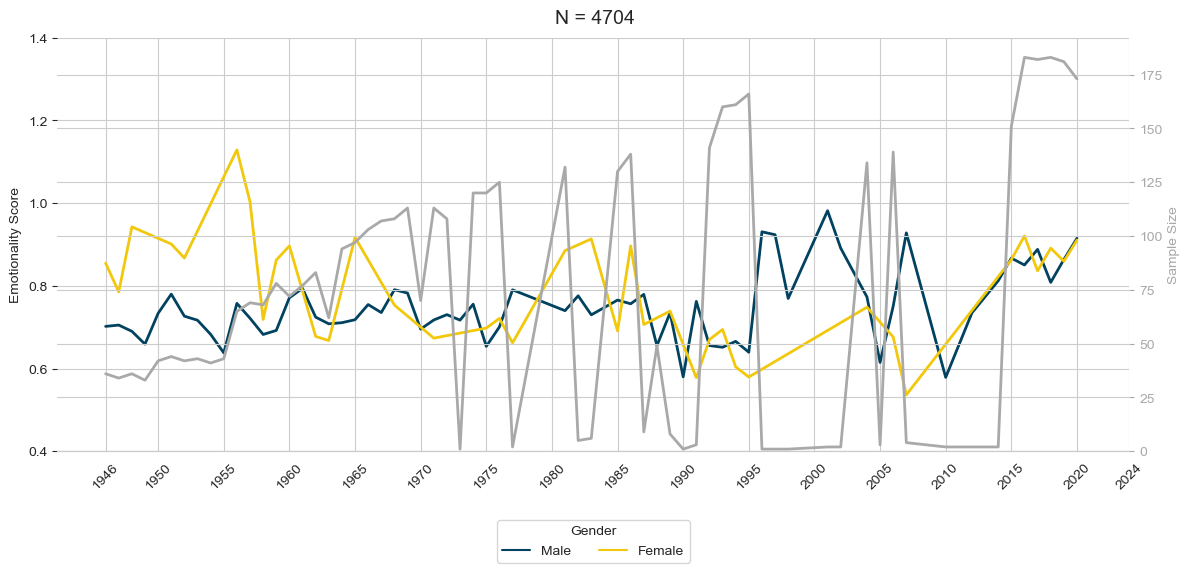

In [45]:
# Mean scores by year and gender
score_over_time_gender = (
    un_corpus_scored
    .groupby(['year', 'gender_dummy'])['score']
    .mean()
    .reset_index()
)

score_over_time_gender['gender_label'] = score_over_time_gender['gender_dummy'].map({0: 'Male', 1: 'Female'})

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: Emotionality score by gender
sns.lineplot(
    data=score_over_time_gender,
    x='year',
    y='score',
    hue='gender_label',
    palette={'Male': CUSTOM_COLORS[0], 'Female': CUSTOM_COLORS[2]},
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=gender_sample_size_per_year.index,
    y=gender_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

ax1.legend(
    title="Gender",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

sns.despine(**DESPINE_SETTINGS)
plt.suptitle(f"N = {gender_total}", fontsize=14, y=0.96)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_gender.png'))
plt.show()


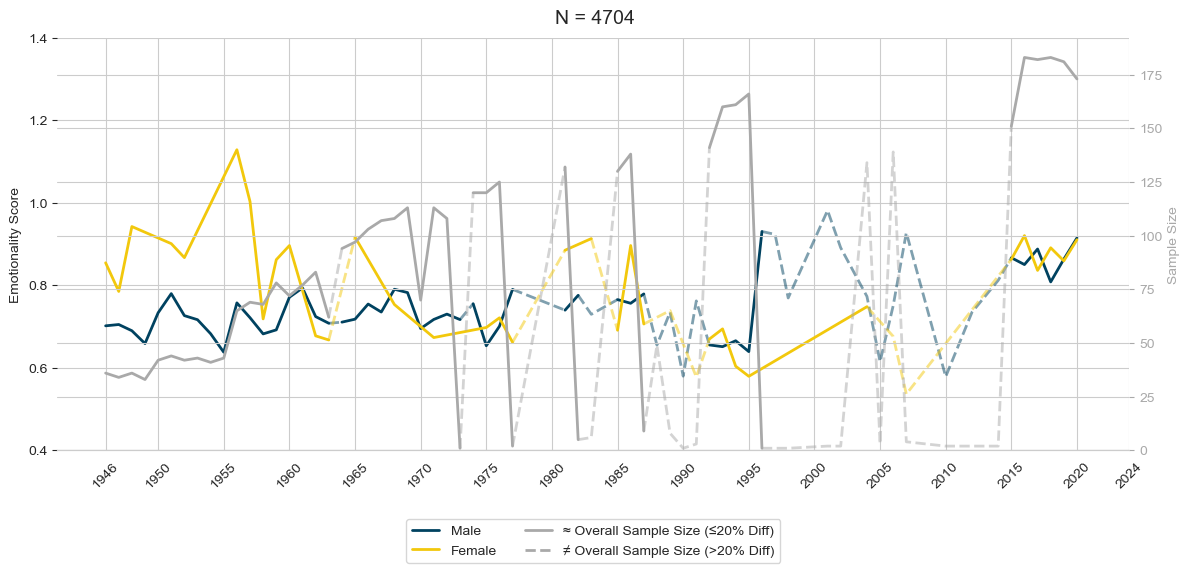

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
from matplotlib.lines import Line2D

# === Mean scores by year and gender ===
score_over_time_gender = (
    un_corpus_scored
    .groupby(['year', 'gender_dummy'])['score']
    .mean()
    .reset_index()
)
score_over_time_gender['gender_label'] = score_over_time_gender['gender_dummy'].map({0: 'Male', 1: 'Female'})

# === Overall sample size per year ===
# Align overall sample size to gender_sample_size_per_year
overall_aligned = overall_sample_size_per_year.reindex(gender_sample_size_per_year.index)

# Lower and upper bounds for ±20%
lower_bound = overall_aligned * 0.75
upper_bound = overall_aligned * 1.25

# Determine where gender sample size deviates more than 20%
deviates_20pct = (gender_sample_size_per_year < lower_bound) | (gender_sample_size_per_year > upper_bound)

# --- Figure setup ---
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# --- Helper function to plot segmented lines ---
def plot_conditional_segments(ax, x, y, threshold_indices, color, linewidth=LINEWIDTH, alpha_solid=1.0, alpha_dotted=0.5):
    """
    Plots a line that is solid when threshold_indices is False, dotted when True.
    """
    x, y = list(x), list(y)
    threshold_indices = list(threshold_indices)
    start_idx = 0
    current_style = '-' if not threshold_indices[0] else '--'
    current_alpha = alpha_solid if current_style == '-' else alpha_dotted

    for i in range(1, len(y)):
        new_style = '-' if not threshold_indices[i] else '--'
        new_alpha = alpha_solid if new_style == '-' else alpha_dotted
        if new_style != current_style:
            ax.plot(x[start_idx:i+1], y[start_idx:i+1],
                    color=color, linewidth=linewidth,
                    linestyle=current_style, alpha=current_alpha)
            start_idx = i
            current_style = new_style
            current_alpha = new_alpha

    # Plot last segment
    ax.plot(x[start_idx:], y[start_idx:],
            color=color, linewidth=linewidth,
            linestyle=current_style, alpha=current_alpha)

# --- Plot emotionality scores by gender with conditional linestyle ---
for gender, color in zip([0, 1], [CUSTOM_COLORS[0], CUSTOM_COLORS[2]]):
    df_gender = score_over_time_gender[score_over_time_gender['gender_dummy'] == gender]
    x_gender = df_gender['year'].values
    y_gender = df_gender['score'].values
    # Align threshold array with x_gender
    threshold_indices = deviates_20pct.reindex(x_gender, fill_value=False).values
    plot_conditional_segments(ax1, x_gender, y_gender, threshold_indices, color=color)

ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# --- Plot sample size line with same conditional linestyle ---
ax2 = ax1.twinx()
x_sample = gender_sample_size_per_year.index
y_sample = gender_sample_size_per_year.values
plot_conditional_segments(ax2, x_sample, y_sample, deviates_20pct.values, color='darkgrey')

ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

# --- X-axis ticks and labels ---
ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# --- Custom legend ---
legend_handles = [
    Line2D([0], [0], color=CUSTOM_COLORS[0], lw=LINEWIDTH, label='Male'),
    Line2D([0], [0], color=CUSTOM_COLORS[2], lw=LINEWIDTH, label='Female'),
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='-', label='≈ Overall Sample Size (≤20% Diff)'),
    Line2D([0], [0], color='darkgrey', lw=LINEWIDTH, linestyle='--', label='≠ Overall Sample Size (>20% Diff)')
]
ax1.legend(handles=legend_handles, loc=LEGEND_LOC, bbox_to_anchor=LEGEND_BBOX, ncol=2)

# --- Styling ---
sns.despine(**DESPINE_SETTINGS)
plt.suptitle(f"N = {gender_total}", fontsize=14, y=0.96)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)

# --- Save and show ---
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_gender.png'))
plt.show()


### Figure: Emotionality Scoring by english as official language

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

NameError: name 'official_language_sample_size_per_year' is not defined

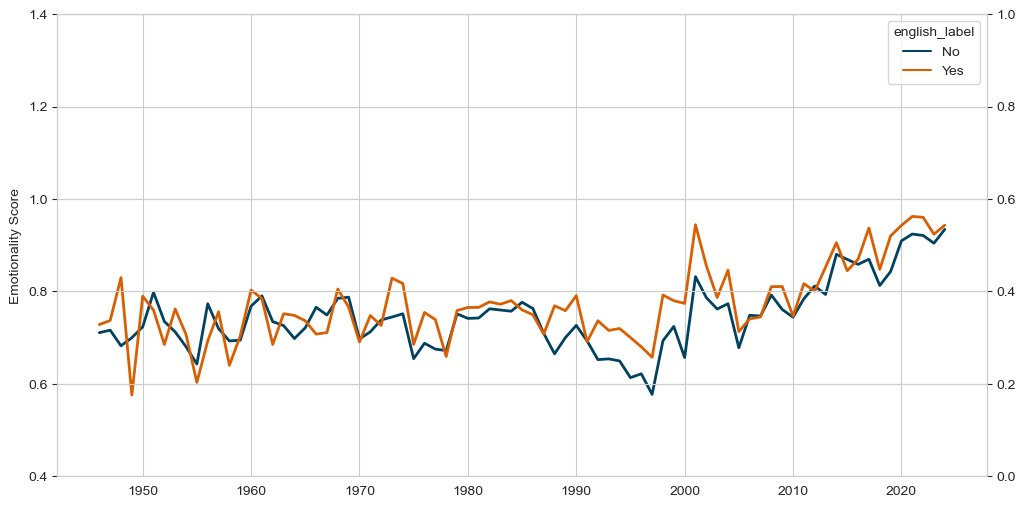

In [53]:
# Mean scores by year and English official language
score_over_time_official_language = (
    un_corpus_scored
    .groupby(['year', 'english_official_language'])['score']
    .mean()
    .reset_index()
)
score_over_time_official_language['english_label'] = score_over_time_official_language['english_official_language'].map({0: 'No', 1: 'Yes'})

# === Plot ===
fig, ax1 = plt.subplots(figsize=(12,6))

# Left y-axis: Emotionality score by English official language
sns.lineplot(
    data=score_over_time_official_language,
    x='year',
    y='score',
    hue='english_label',
    palette={'No': '#004260', 'Yes': '#D95F02'},
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size in dark grey
ax2 = ax1.twinx()
sns.lineplot(
    x=official_language_sample_size_per_year.index,
    y=official_language_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Legend
ax1.legend(
    title="English as official language",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

plt.suptitle(f"N = {official_language_total}", fontsize=14, y=0.96)
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_english_official_language.png'))
plt.show()


### Figure: Emotionality Scoring by Speaker Position

C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
C:\Users\sarah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length

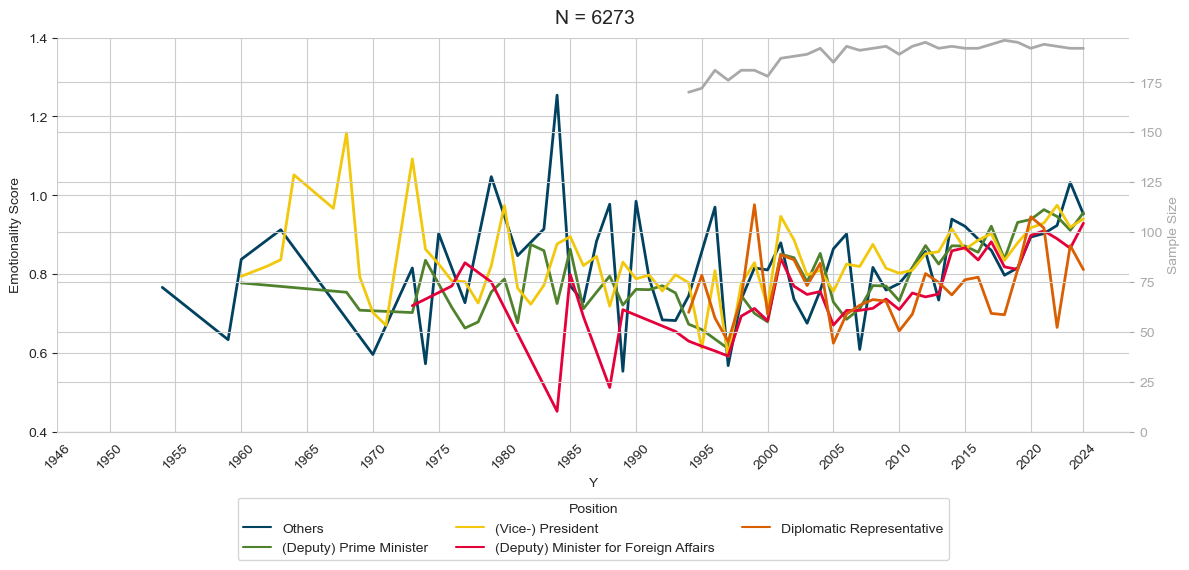

In [55]:
# Mean emotionality score by year and position
score_over_time_position = (
    un_corpus_scored
    .groupby(['year', 'position'])['score']
    .mean()
    .reset_index()
)

# Drop "Others" if not needed
#score_over_time_position = score_over_time_position[score_over_time_position['position'] != "Others"]

# Ensure position is string
score_over_time_position['position'] = score_over_time_position['position'].astype(str)

# === Plot ===
fig, ax1 = plt.subplots(figsize=FIGSIZE)

# Left y-axis: emotionality scores by position
sns.lineplot(
    data=score_over_time_position,
    x='year',
    y='score',
    hue='position',
    palette=CUSTOM_COLORS,  # your predefined palette
    linewidth=LINEWIDTH,
    ax=ax1
)
ax1.set_xlabel("Y")
ax1.set_ylabel("Emotionality Score")
ax1.tick_params(axis='y')
ax1.set_ylim(Y_RANGE_EMOTIONALITY)

# Right y-axis: sample size
ax2 = ax1.twinx()
sns.lineplot(
    x=position_sample_size_per_year.index,
    y=position_sample_size_per_year.values,
    color='darkgrey',
    linewidth=LINEWIDTH,
    ax=ax2
)
ax2.set_ylabel("Sample Size", color='darkgrey')
ax2.tick_params(axis='y', colors='darkgrey')
ax2.set_ylim(bottom=SECOND_Y_AXIS_BOTTOM)

ax1.set_xticks(TICK_YEARS)
ax1.set_xticklabels(TICK_YEARS, rotation=XTICK_ROTATION)

# Legend
ax1.legend(
    title="Position",
    loc=LEGEND_LOC,
    bbox_to_anchor=LEGEND_BBOX,
    ncol=LEGEND_NCOL
)

plt.suptitle(f"N = {position_total}", fontsize=14, y=0.96)
sns.despine(**DESPINE_SETTINGS)
plt.tight_layout(rect=TIGHT_LAYOUT_RECT)
plt.savefig(os.path.join(fig_dir, 'emotionality_score_over_time_position.png'))
plt.show()

In [395]:
# Count speeches per year and position
counts_per_year = (
    un_corpus_scored
    .groupby(['year', 'position'])
    .size()
    .reset_index(name='count')
)

# Drop "Others"
#counts_per_year = counts_per_year[counts_per_year['position'] != "Others"]

# Pivot into a wide table for readability
counts_pivot = (
    counts_per_year
    .pivot(index='year', columns='position', values='count')
    .fillna(0)
    .astype(int)
)

# Display nicely
from IPython.display import display
display(counts_pivot)



position,(Deputy) Minister for Foreign Affairs,(Deputy) Prime Minister,(Vice-) President,Diplomatic Representative,Others
year,,,,,
1954,0,0,0,0,1
1959,0,0,0,0,1
1960,0,6,7,0,6
1962,0,0,2,0,0
1963,0,0,1,0,1
1964,0,0,2,0,0
1967,0,0,1,0,0
1968,0,1,1,0,0
1969,0,1,2,0,0
